# Data Analysis in Geoscience Remote Sensing Projects: Exercises [2020]
## Final task handed in by: Ka Hei Pinky Chow, on 30th August 2020

Hendrik Andersen, contact: hendrik.andersen@kit.edu and Julia Fuchs, contact: julia.fuchs@kit.edu

Task: In a typical scientific workflow, the first step is to get an overview of the data. Typically, visualizations of descriptive statistics are very useful to achieve this.  
1. Plot a map of the data and its variability [average, standard deviation of AOD]
2. Plot the long-term development of AOD - what trends exist?  [resample to yearly, trend analyses]
3. Plot the distributions of AOD for each month (January, February, March) - how is the data distributed, what differences exist between the months and are they significant? [histogram, boxplot, ttest] 

In [43]:
# code here, make sure to also comment code to make it understandable, you can add cells here as you wish
#import libraries
import xarray as xr
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy import stats

#import dataset
aod = xr.open_dataset('modis_aod_china.nc')
meteo = xr.open_dataset('E_r1_full.nc')

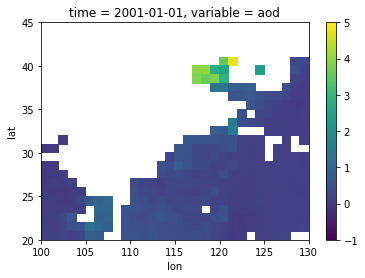

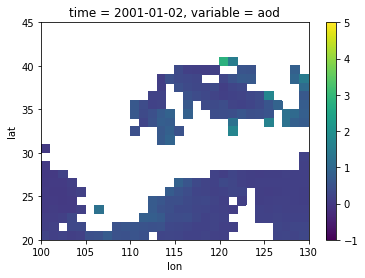

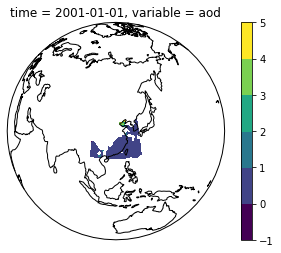

In [2]:
#Plot a map of the data and its variability [average, standard deviation of AOD]
aod #aerosol observation
meteo #meteorological variables

#To visualize the AOD data, isel function is used to view the spatial data in a specific time (time = 0, 1)
#AOD dataset is transformed into array for visualization
aod_arr = aod.to_array()
aod_arr.isel(time=0).plot(vmin=-1,vmax=5); plt.show()
aod_arr.isel(time=1).plot(vmin=-1,vmax=5); plt.show()

#The data is also mapped in Equirectangular Projection for easier comprehension
ax = plt.axes(projection=ccrs.Orthographic(115, 35))
aod_arr[0].isel(time=0).plot.contourf(ax=ax,vmin=-1,vmax=5,transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines(); plt.show()

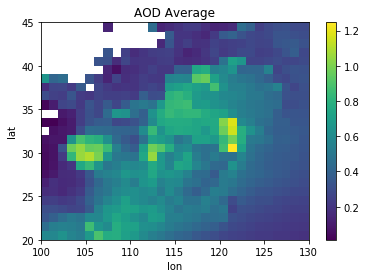

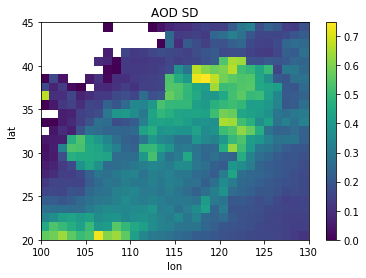

In [7]:
#Plotting variability of the dataset
#Plot the average: the mean of the AOD data over time dimension is calculated and plotted as 2D map
aod_arr.mean(dim='time').plot()
plt.title("AOD Average")
plt.show()

#Plot the standard deviation: the standard deviation of the AOD data over time dimension is calculated and plotted as 2D map
aod_arr.std(dim='time').plot()
plt.title("AOD SD")
plt.show()

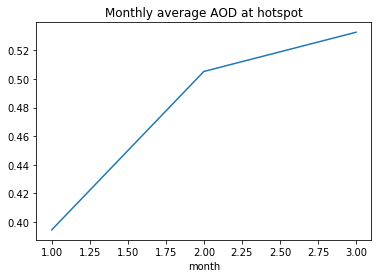

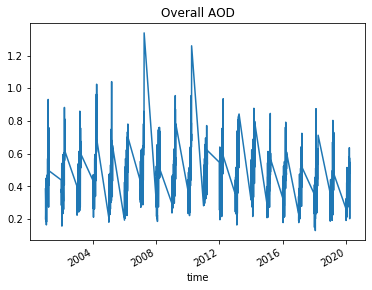

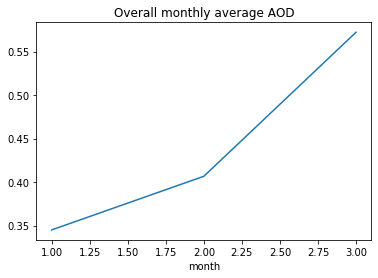

In [3]:
#Monthly average AOD at hotspot
#We can see from the previous graph there is a "hotspot" around lon = 120; lat = 40
#The data from this hotspot is grouped by month to visualize the monthly average
month = aod_arr.sel(lon=120, lat=40, method = "nearest").groupby('time.month').mean().plot()
plt.title('Monthly average AOD at hotspot')
plt.show()

#Overall AOD
#To better understand the temporal variations of AOD, all grid cells are averaged and plotted
#It shows the variations of AOD over time in the first three months of the year
#It can see the AOD is generally increasing for the first three months and every year shows very similar patterns
#Year 2007 and 2010 show high variability
aod_arr.mean(dim=['lon','lat']).plot()
plt.title('Overall AOD')
plt.show()

#Overall monthly average AOD
#All grid cells are averaged; the data is then grouped by month to show monthly average for in general
#Results show AOD increases for the first three months; the variability is generally higher than at the hotspot
#and the differences between February and March is the highest
aod_arr.mean(dim=['lon','lat']).groupby('time.month').mean().plot()
plt.title('Overall monthly average AOD')
plt.show()


C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


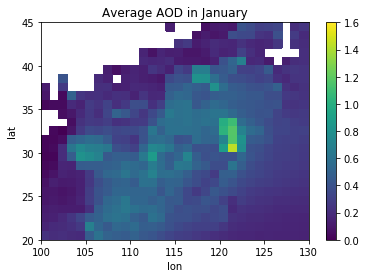

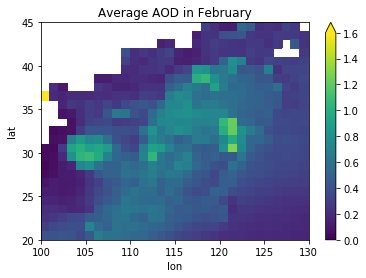

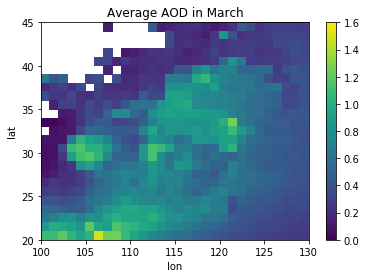

In [4]:
#Average AOD for each month
#AOD value for all grid cells are averaged over time and visualized in a map

#January
aod_arr.sel(time = np.isin(aod_arr['time.month'], 1)).mean(dim='time').plot(vmin=0,vmax=1.6)
plt.title("Average AOD in January")
plt.show()

#February
aod_arr.sel(time = np.isin(aod_arr['time.month'], 2)).mean(dim='time').plot(vmin=0,vmax=1.6)
plt.title("Average AOD in February")
plt.show()

#March
aod_arr.sel(time = np.isin(aod_arr['time.month'], 3)).mean(dim='time').plot(vmin=0,vmax=1.6)
plt.title("Average AOD in March")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


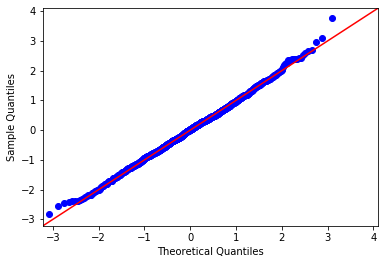

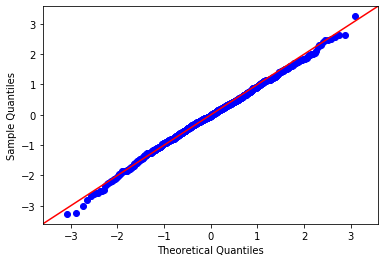

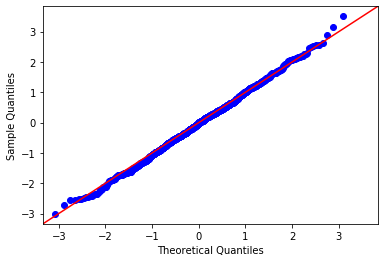

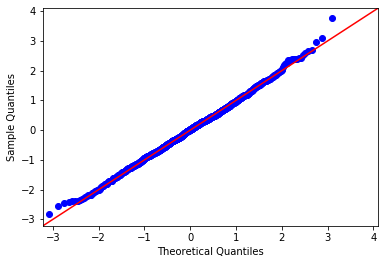

In [172]:
import statsmodels.api as sm
from scipy.stats import norm

#Test normal distribution
#QQplot is implemented for testing normal distribution
#Results shows that data seems to be normally distributed
test_data = aod_arr.sel(time = np.isin(aod_arr['time.month'], 1)).mean(dim='time').values.ravel()
test_data = norm.rvs(size=1000)
sm.qqplot(test_data, line='45')

test_data = aod_arr.sel(time = np.isin(aod_arr['time.month'], 2)).mean(dim='time').values.ravel()
test_data = norm.rvs(size=1000)
sm.qqplot(test_data, line='45')

test_data = aod_arr.sel(time = np.isin(aod_arr['time.month'], 3)).mean(dim='time').values.ravel()
test_data = norm.rvs(size=1000)
sm.qqplot(test_data, line='45')

In [5]:
#Hypothesis Testing (T-Test)
#Hypothesis testing is perfornmed to test if the average AOD are significantly different between months
#Normal distribution is assumed

#Between January and February
X = aod_arr.sel(time = np.isin(aod_arr['time.month'], 1)).mean(dim='time').values.ravel()
y = aod_arr.sel(time = np.isin(aod_arr['time.month'], 2)).mean(dim='time').values.ravel()
t,p1 = stats.ttest_ind(X, y, nan_policy='omit') # t is the t-statistic, p is the two-sided significance
print(p1)
p1 < 0.01

#Between February and March
X = aod_arr.sel(time = np.isin(aod_arr['time.month'], 2)).mean(dim='time').values.ravel()
y = aod_arr.sel(time = np.isin(aod_arr['time.month'], 3)).mean(dim='time').values.ravel()
t,p2 = stats.ttest_ind(X, y, nan_policy='omit')
print(p2)
p2 < 0.01

#Between March and January
X = aod_arr.sel(time = np.isin(aod_arr['time.month'], 1)).mean(dim='time').values.ravel()
y = aod_arr.sel(time = np.isin(aod_arr['time.month'], 3)).mean(dim='time').values.ravel()
t,p3 = stats.ttest_ind(X, y, nan_policy='omit')
print(p3)
p3 < 0.01

3.6098056621387215e-09
1.5556047594861636e-17
2.9919170462047444e-45


True

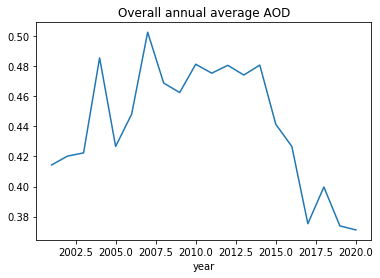

C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


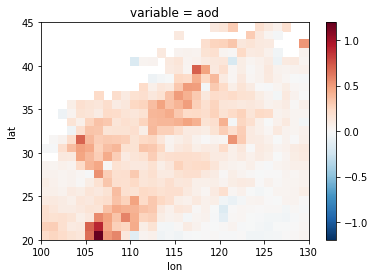

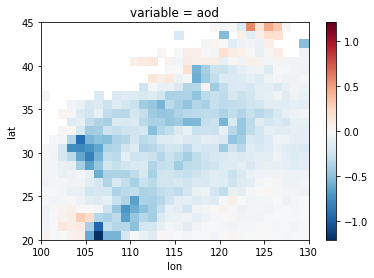

In [8]:
#AOD long term development
#All grid cells are averaged; annual mean is calculated and plotted
aod_arr.mean(dim=['lon','lat']).groupby('time.year').mean().plot()
plt.title('Overall annual average AOD')
plt.show()

#Results show that there seem to be a positive trend from 2002 to 2012 and a negative trend afterwards
#Thus, to better understand the spatial differences, difference between 2002 to 2012 and 2012 to 2020 are mapped

#Differences between 2002 and 2012
diff_02to12 = aod_arr.sel(time = np.isin(aod_arr['time.year'], 2012)).mean(dim='time') - aod_arr.sel(time = np.isin(aod_arr['time.year'], 2002)).mean(dim='time')
diff_02to12.plot(); plt.show()

#Differences between 2012 and 2020
diff_12to20 = aod_arr.sel(time = np.isin(aod_arr['time.year'], 2020)).mean(dim='time') - aod_arr.sel(time = np.isin(aod_arr['time.year'], 2012)).mean(dim='time')
diff_12to20.plot(); plt.show()

Describe the results here

when time = 0, the majority of the pixels indicates AOD value (Aerosol Optical Depth) slightly more than 0. There is a peak region (around lat = 38, lon = 120) where AOD is clearly higher than its neighbouring regions. The values there is around 4.
On average, in particular regions (lat = 30, lon = 105, 112, 120) the AOD values are higher. The AOD value is lower at the top and left edges where AOD is close to 0.

Regarding the variance of the data, regions in the middle also show high variance in comparison to the edges. At region (lon = 120, lat = 40), the variance is as high as 0.7. The variance gradfually decreases towards the edges. The data demonstrates aerosol does not distribute evenly in coastal region of China, but tends to concentrate at region around Qinhuangdao at the coast. In the same region (hotspot), the aerosol concentration highly varies. The AOD in January tends to be the lowest among three months. It is in average as low as 0.4.The average increases to 0.5 in February and further to 0.52 in March. The average value overall is not as high as in the hotspot region in January and February, with AOD value 0.35 and 0.42. However, in March, the average value of AOD seem to exceed the hotspot, indicates the movement of aerosol in the atmonsphere.

The spatial distribution of AOD is plotted for January, Februar, and March. It is shown that the AOD hotspot is more concentrated in January, and begin to spread to the south-west direction afterwards. In March, region next to Hanoi (lon = 107, lat = 20) seems to emerge into another hotspot. Two-tailed T-test is performed to compare the mean AOD for all locations in January, February, and March. With p-value much lower than 0.01, results from all months demonstrates a different mean value. The difference between January and March, followed by between February and March are of most confidance. Null hypothesis that they share the same normal distribution is rejected, leading to the alternative hypothesis that AOD value in January, February, and March are significantly different. However, the AOD values over the spatial regions might not follow normal distribution so the validity of t-test is limited.

Regarding the long term development, by plotting the overall year average in spatial map, there seems to be a clear surge from 202 till 2012, and a continuous decreases afterwards till 2020. In around 2004 and 2007, temporary peaks can be observed. To confirm the trend from 2002 to 2012 and from 2012 to 2020, annual differences are calculated for the pixels and plotted in the maps. It is clear that there is a increases for almost all of the grid cells between 2002 and 2012 of AOD with 0 to 1 unit differences. The central pixels show more varibility than the peripheral pixels. Meanwhile, AOD values drop for most of the locations although increases can be seen in some peripheral pixels. Region next to Hanoi (lon = 107, lat = 20) share most of the changes. To sum up, there exists a long term increasing trend for the first decade followed by a decreasing trend for the rest of the time frame.

__Task__: 
Analyze the statistical relationship between the siberian high pressure index (SHPI, https://www.atmos-chem-phys.net/15/11919/2015/acp-15-11919-2015.pdf) and AOD
1. Compute a correlation in each grid cell, log-transform the data if necessary
2. Plot the correlations and the p values as a map
3. Describe the relationship between AOD and SHPI:
    - How strong are they?
    - Are they similar everywhere?
    - Are the relationships significant [hint: you can plot the boolean (True/False) of (p value < 0.05) as a map]?
    - How much AOD variance is explained by the SHPI? [plot map of R²] 

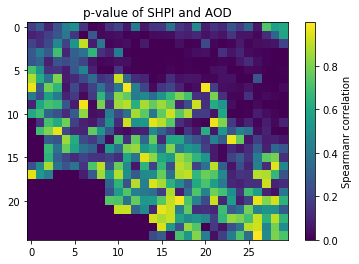

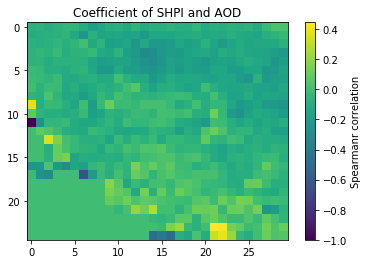

In [19]:
# code here, make sure to also comment code to make it understandable, you can add cells here as you wish
#Calculate minimum latitude and longitude for loop implementation
lat0 = np.min(aod.lat)
lon0 = np.min(aod.lon)
#Construct a zero matrix for the grid cells to calculate correlation
p = np.zeros([aod.lat.size,aod.lon.size])

#Looping through lat and lon
#Spearmanr correlation is peroformed as strict normal distribution is not required for non-parametric test
#The data is first resampled to weekly mean to reduce irrelevant variability for p-value estimation
#P-value is only calculated when nan values is not too many to cause an error
for i in range(aod.lat.size):
    for j in range(aod.lon.size):
        a = aod.to_array()[0].sel(lon=lon0+j, lat=lat0+i, method="nearest").resample(time = "W").mean()
        b = meteo.shpi.sel(lon=lon0+j, lat=lat0+i, method="nearest").resample(time = "W").mean()
        if np.isnan(a).sum() < 1000 and np.isnan(b).sum() < 1000:
            p[i,j] = stats.spearmanr(a,b,nan_policy='omit')[1]
        if np.isnan(a).sum() >= 1000 and np.isnan(b).sum() >= 1000:
            p[i,j] = np.nan
#[1] refers to the p-value

#Plotting the color-coded graph to show spatial variations of p-value
plt.imshow(p)
cmap = plt.get_cmap('jet')
cmap.set_bad(color = 'r', alpha = 1.)
plt.colorbar(label='Spearmanr correlation')
plt.title('p-value of SHPI and AOD')
plt.ylabel("lat")
plt.xlabel("lon")
plt.show()

#The data is first resampled to weekly mean to reduce irrelevant variability for correlation estimation
#Correlaton is only calculated when nan values is not too many to cause an error
cor = np.zeros([aod.lat.size,aod.lon.size])
for i in range(aod.lat.size):
    for j in range(aod.lon.size):
        a = aod.to_array()[0].sel(lon=lon0+j, lat=lat0+i, method="nearest").resample(time = "W").mean()
        b = meteo.shpi.sel(lon=lon0+j, lat=lat0+i, method="nearest").resample(time = "W").mean()
        if np.isnan(a).sum() < 1000 and np.isnan(b).sum() < 1000:
            cor[i,j] = stats.spearmanr(a,b,nan_policy='omit')[0]
        if np.isnan(a).sum() >= 1000 and np.isnan(b).sum() >= 1000:
            p[i,j] = np.nan
#[0] refers to the coefficient

#Plotting the color-coded graph to show spatial variations of correlation
plt.imshow(cor)
cmap = plt.get_cmap('jet')
cmap.set_bad(color = 'r', alpha = 1.)
plt.colorbar(label='Spearmanr correlation')
plt.title('Coefficient of SHPI and AOD')
plt.ylabel("lat")
plt.xlabel("lon")
plt.show()

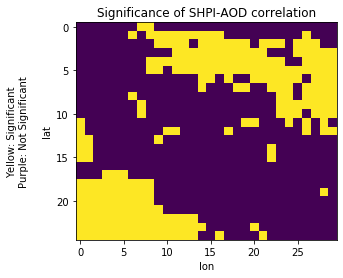

In [77]:
#Significance
#Checking which grid cells have p-value lower than 0.05 (significant correlation)
plt.imshow(p < 0.05)
plt.title('Significance of SHPI-AOD correlation')
plt.ylabel("Yellow: Significant\nPurple: Not Significant\n\nlat")
plt.xlabel("lon")
plt.show()

In [106]:
from scipy import stats

#Function for calculating r2
def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

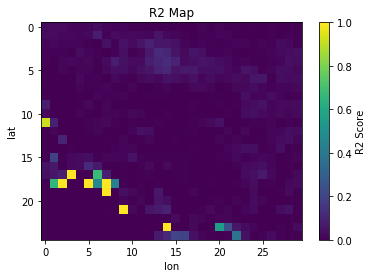

In [107]:
#R2 score

#Construct zero matrix
r2 = np.zeros([aod.lat.size,aod.lon.size])
#Looping thorugh lat and lon
for i in range(aod.lat.size):
    for j in range(aod.lon.size):
        #loop through weekly average for different lat and lon; skip the nan value
        #manually delete nan value
        a = aod.to_array()[0].sel(lon=lon0+j, lat=lat0+i, method="nearest").resample(time = "W").mean(skipna = True).values.ravel()
        b = meteo.shpi.sel(lon=lon0+j, lat=lat0+i, method="nearest").resample(time = "W").mean(skipna = True).values.ravel()
        a_nan = np.ravel(np.argwhere(np.isnan(a)))
        a = np.delete(a,a_nan)
        b = np.delete(b,a_nan)
        b_nan = np.ravel(np.argwhere(np.isnan(b)))
        a = np.delete(a,b_nan)
        b = np.delete(b,b_nan)
        #make sure SHPI and AOD have enough sample for r2 calculation
        if len(a) > 1 and len(b) > 1:
            r2[i,j] = rsquared(a,b) #apply the function
            
#Plotting color-coded graph
plt.imshow(r2)
plt.colorbar(label='R2 Score')
plt.title('R2 Map')
plt.ylabel("lat")
plt.xlabel("lon")
plt.show()




Describe the results here

Weekly average of SHPI and AOD are calculated for every grid cell, which is inputted for the estimation of Spearmanr correlation. As the distribution of weekly average SHPI and AOD shall not be assumed normally distributed, non-parametric Spearmanr correlation is implemented. In the test, the strength and direction of monotonic association between the two variables is calculated. Weekly average is used to reduce high variability of individual measurements.

The p-values are generally high, yet demonstrates spatial patterns. The large values are sparsely distributed, and mostly along the diagonal towards Southeast direction. The p-value in the top right and botten left corner is close to zero. 

Regarding the coefficient, in the left bottom corner, SHPI and AOD are not correlated at all. In the upper right corner, two variables are weakly and negatively correlated. Along the diagonal towards Southeast direction, SHPI and AOD are weakly and positively correlated. It means, there is a weak negative correlation between two variables in the upper right corner and there is no correlation in the bottom left corner with significance.

Little of the AOD variance can be explained by SHPI. It can be seen from R2 that majority of the grid cells has R score less than 0.2 and close to 0. There are, however, some specific grid cells at the bottom left corner where the R2 value close to 1.

__Task__:
Use a machine learning model to 
1. Predict AOD as accurately as possible [low validation error (e.g. MSE or RMSE) and high explained variance (R²), tuning of hyperparameters]
2. Plot a scatter plot of observed AOD vs. model predicted AOD to visualize model performance
3. Which input variables are most important for the model to predict AOD? [feature importance]
3. Analyze the 3 most important meteorological features in more detail: How do they influence AOD? [partial dependence]

In [167]:
#import the libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

In [109]:
# code here, make sure to also comment code to make it understandable, you can add cells here as you wish
# some code to help you get started:
y = aod.aod.sel(lat=slice(*[35,30]), lon = slice(*[116,123])).stack(time_space=['time','lat','lon'])
y = np.log(y) # log-transform the aod data to approximate normal distribution

#y = AOD data
#x = SHPI
meteo_region = meteo.sel(lat=slice(*[35,30]), lon = slice(*[116,123])) # select a region in eastern China
x = meteo_region.stack(time_space=['time','lat','lon']) # all pixels are stacked into one dimension 
# the following lines are to remove missing values 
x = x.where(y.notnull().values).dropna('time_space','all')
y = y.where(y.notnull().values).dropna('time_space','any')
y = y.where(~xr.ufuncs.isnan(x.u_72).values).dropna('time_space','any')
x = x.where(~xr.ufuncs.isnan(x.u_72).values).dropna('time_space','all')
x = x.where(~np.isinf(y).values).dropna('time_space','all')
y = y.where(~np.isinf(y)).dropna('time_space','any')
x = x.to_dataframe()
y = y.to_dataframe()

features = list(x.columns)
# now you can use the variables "x" and "y" to train, validate and analyze the machine learning model

#x(AOD) and y(SHPI) dataset for all years and grid cells are used for the model
#one-third of the dataset is included
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

# define parameters for the first trial
params = {'n_estimators': 500,
          'max_depth': 2,
          'min_samples_split': 2,
          'learning_rate': 0.03,
          'loss': 'ls'}
# Create the machine learning model with defined parameters
model = GradientBoostingRegressor(**params) 
# Fit model with training data
model.fit(x_train, y_train)

#Check out the performance of models: MSE and R2 score
mse_test = mean_squared_error(y_test, model.predict(x_test))
print("MSE of the test set: {:.4f}".format(mse_test))
r2_test = r2_score(y_test, model.predict(x_test))
print("R2 of the test set: {:.4f}".format(r2_test))

#Tuning the performance of model
param_grid = {'n_estimators':[500,800,1000],'learning_rate': [0.1,0.03,0.003],'max_depth': [2,3,4], 'min_samples_leaf': [5,10,20]}
# define the default model
model = GradientBoostingRegressor()
# perform the randomized search using 5 combinations
gs_cv = RandomizedSearchCV(model, param_grid,cv=5,n_iter=5, scoring='r2').fit(x_train, y_train)
# the parameters with the best scores are saved as gs_cv.best_params_
params = {'loss':'ls','max_depth':gs_cv.best_params_['max_depth'], \
          'n_estimators':gs_cv.best_params_['n_estimators'], 'learning_rate':gs_cv.best_params_['learning_rate'], \
          'min_samples_leaf':gs_cv.best_params_['min_samples_leaf']}
print(params) #print out the best combination of parameters

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE of the test set: 0.2220
R2 of the test set: 0.4326


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'loss': 'ls', 'max_depth': 3, 'n_estimators': 500, 'learning_rate': 0.1, 'min_samples_leaf': 5}


In [121]:
#Apply the optimalized parameters for the model
#{'loss': 'ls', 'max_depth': 3, 'n_estimators': 500, 'learning_rate': 0.1, 'min_samples_leaf': 5}
params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_leaf': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

# Create the machine learning model with defined parameters
best_model = GradientBoostingRegressor(**params) 
# Fit model with training data
best_model.fit(x_train, y_train)

#Check out the performance of models with best combinations of parameters: MSE and R2 score
mse_test = mean_squared_error(y_test, best_model.predict(x_test))
print("MSE of the test set: {:.4f}".format(mse_test))
r2_test = r2_score(y_test, best_model.predict(x_test))
print("R2 of the test set: {:.4f}".format(r2_test))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE of the test set: 0.1902
R2 of the test set: 0.5138


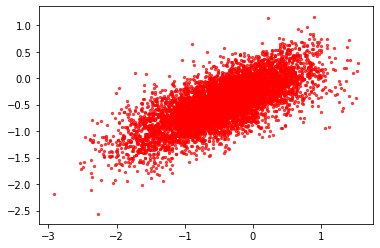

In [157]:
#Plotting predicted AOD value as a scatter plot
len(y_test.values.ravel()) == len(best_model.predict(x_test))
plt.scatter(y_test.values.ravel(),best_model.predict(x_test),c = 'r', alpha = 0.7, s = 5)

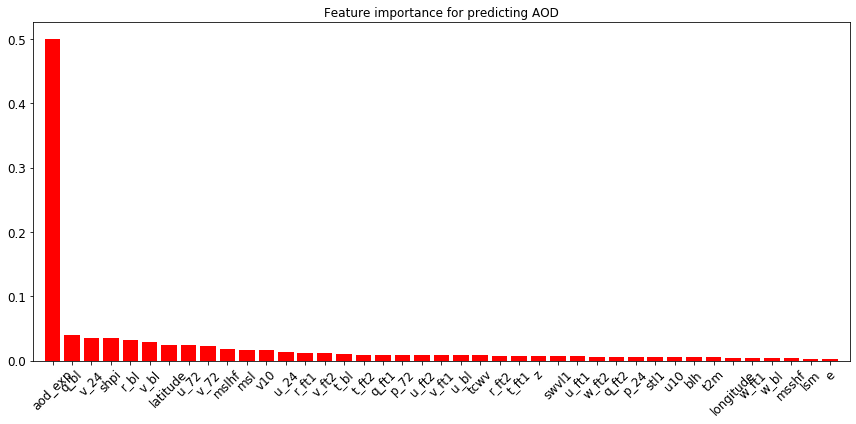

In [164]:
#Feature Importance
fig = plt.figure(figsize=(12, 6))
feature_importance = best_model.feature_importances_ #Find out with sklearn built-in function
indices = np.argsort(feature_importance)[::-1] # indices sorted from the highest to the lowest imporance
#Plotting
plt.bar(range(x.shape[1]),feature_importance[indices], color="r",align="center")
plt.xticks(range(x.shape[1]), np.array(x.columns)[indices], rotation = 45)
plt.xlim([-1, x.shape[1]])
plt.tick_params(labelsize=12)
plt.title('Feature importance for predicting AOD')
plt.tight_layout()
plt.show()

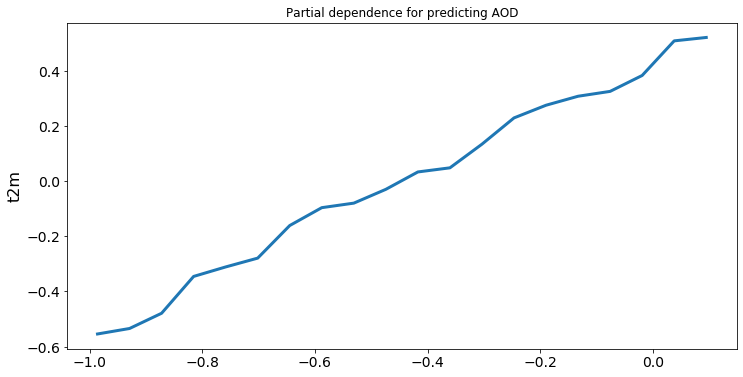

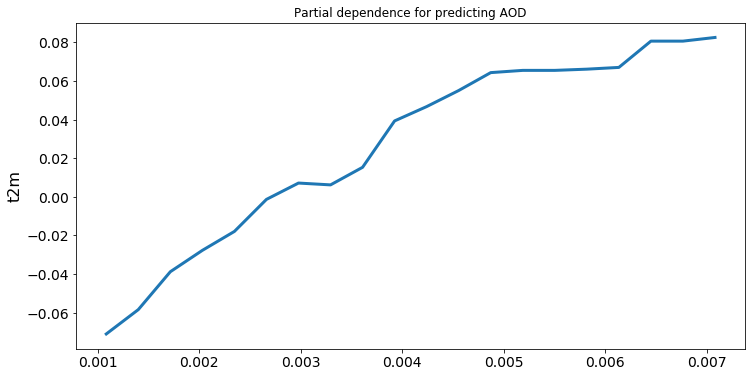

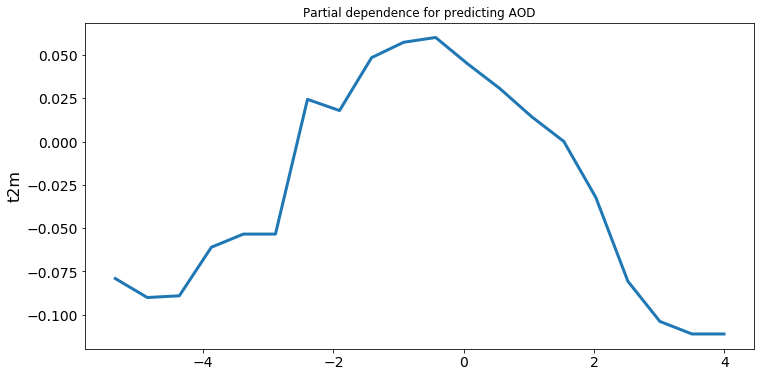

In [170]:
#Accoridng to the feature importance graph, the 3 most important meteorological features are: 
#aod_exp(Expected AOD from the climatological signals), q_bl(Specific humidity in the boundary layer) 
#and v_24(24 hour average V-component of wind at 10 meters)

#Inputted into partial dependance evaluation

#aod_exp
pdp, axes = partial_dependence(best_model, x_train, features=['aod_exp'], grid_resolution=20)
#Plotting
fig = plt.figure(figsize=(12, 6))
plt.plot(axes[0],pdp[0], lw=3,ls = '-')
plt.xlabel('',fontsize=16)
plt.tick_params(labelsize=14)
plt.title('Partial dependence for predicting AOD')
plt.xlabel('Expected AOD from the climatological signals',fontsize=16)
plt.ylabel('t2m',fontsize=16)
plt.show()

#q_bl
pdp, axes = partial_dependence(best_model, x_train, features=['q_bl'], grid_resolution=20)
#Plotting
fig = plt.figure(figsize=(12, 6))
plt.plot(axes[0],pdp[0], lw=3,ls = '-')
plt.xlabel('',fontsize=16)
plt.tick_params(labelsize=14)
plt.title('Partial dependence for predicting AOD')
plt.ylabel('t2m',fontsize=16)
plt.xlabel('Specific humidity in the boundary layer', fontsize=16)
plt.show()

#v_24
pdp, axes = partial_dependence(best_model, x_train, features=['v_24'], grid_resolution=20)
#Plotting
fig = plt.figure(figsize=(12, 6))
plt.plot(axes[0],pdp[0], lw=3,ls = '-')
plt.xlabel('',fontsize=16)
plt.tick_params(labelsize=14)
plt.title('Partial dependence for predicting AOD')
plt.ylabel('Partial Dependence',fontsize=16)
plt.xlabel('24 hour average V-component of wind at 10 meters', fontsize=16)
plt.show()

Describe the results here

In this task, machine learning technique Gradient Boosting for regression is used for predicting AOD value with given dataset with different features. Gradient Boosting is an ensemble of decision trees which optimize the loss function. It uses the library sklearn and parameters are customly defined for initial model fitting. Afterwards, mean square error and r2 score are used for evaluation.

MSE of the test set: 0.2220
R2 of the test set: 0.4326

It means the performance of the model with initial parameters is fairly good as 0.43 (almost half) of the variance for AOD that's explained by SHPI. Yet, it is not sure if the choices of parameters can be improved. RandomizedSearchCV is used to look for the best parameters. The results are: {'loss': 'ls', 'max_depth': 3, 'n_estimators': 500, 'learning_rate': 0.1, 'min_samples_leaf': 5}, which means to obtain the best prediction results, loss function shall be least square regression, level of depth shall be 3, with learning rate of 0.1 and 500 estimators, and split is only allowed if there is minimum 5 samples at the internal leaf node.With the best model, the performance has improved indicated by both R2 score and mean square error. The results are as followed:

MSE of the test set: 0.1902
R2 of the test set: 0.5138

With the improved results, the MSE is reduced to 0.19 and over half of the AOD variance can be explained by the combinations of features in the E_r1_full.nc dataset.

From the scatter plot, we can see the relationship between AOD value and predicted AOD value from features. It shows a clear positive correlation, which means, the larger the AOD values, the larger the predicted AOD values. It indicates that the given dataset in general seem to be good predictors for anticipating AOD in reality.

We can look into the details of individual feature in the dataset by plotting the feature importance as a given function from sklearn. From the results, it is shown that the contribution of features in the training data is very unevenly distributed. The top three features are aod_exp(Expected AOD from the climatological signals), q_bl(Specific humidity in the boundary layer) and v_24(24 hour average V-component of wind at 10 meters). Together, these three features explained between 0.5 and 0.6 of the variance. Among three, expected AOD from the climatological signals are particularly important: It solely explained almost half of the AOD variance. In comparison, SHPI is not a particularly significant predictor as it solely explains less than 0.05 of the AOD variance. 

From the results of partial dependence, we can understand more about the interactions between the targewt response and the target features. For aod_exp, we can clearly see there is a linear relationship between expected AOD from climitological signals and true AOD. For q_bl, we can also see a close to linear relaitonship between specific humidity in the boundary layer and true AOD. Finally, for v_24, there is non-linear relationship between 24 hour average V-component of wind at 10 meters and true AOD. With increasing v_24, AOD first increases and reaches the peak around v_24 = 0, and then decreases. So there seems to be a negative correlation between the absolute value of v_24 and AOD, which probably because the direction of the wind is not relevant for AOD in this case.

To sum up, AOD can be mostly explained by aod_exp with a strong positive correlation, slightly explained by q_bl with a weak positive correlation and the absolute value of v_24 with a weak negative correlation.

### This cell informs you about the data contained in the file 'E_r1_full.nc'
The data is ERA5 reanalysis data downloaded from https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

If you are interested in learning more about the parameters, you can find more information on each parameter at https://apps.ecmwf.int/codes/grib/param-db

- u10: U-component of wind at 10 meters
- v10: V-component of wind at 10 meters   
- t2m: Air temperature at 2 meters 
- blh: Boundary layer height
- e: Evaporation
- lsm: Land sea mask   
- msl: Mean sur
- mslhf: Mean surface latent heat flux
- msshf: Mean surface sensible heat flux
- z: Height (topography)
- stl1: Soil temperature layer 1
- tcwv: Total columnar water vapor
- swvl1: Soil water volume layer 1
- u_24: 24 hour average U-component of wind at 10 meters
- v_24: 24 hour average V-component of wind at 10 meters      
- p_24: 24 hour average total precipitation 
- u_72: 72 hour average U-component of wind at 10 meters
- v_72: 72 hour average V-component of wind at 10 meters
- p_72: 72 hour average total precipitation 
- longitude
- latitude  
- r_bl: Relative humidity in the boundary layer
- r_ft1: Relative humidity in the lower free troposphere
- r_ft2: Relative humidity in the upper free troposphere 
- q_bl: Specific humidity in the boundary layer 
- q_ft1: Specific humidity in the lower free troposphere  
- q_ft2: Specific humidity in the upper free troposphere    
- t_bl: Temperature in the boundary layer  
- t_ft1: Temperature in the lower free troposphere  
- t_ft2: Temperature in the upper free troposphere     
- u_bl: U-component of wind in the boundary layer
- u_ft1: U-component of wind in the lower free troposphere  
- u_ft2: U-component of wind in the upper free troposphere     
- v_bl: V-component of wind in the boundary layer     
- v_ft1: V-component of wind in the lower free troposphere 
- v_ft2: V-component of wind in the upper free troposphere    
- w_bl: Vertical velocity of wind in the boundary layer   
- w_ft1: Vertical velocity of wind in the lower free troposphere
- w_ft2: Vertical velocity of wind in the upper free troposphere
- shpi: Siberian high position index (see this paper: Jia et al.: A new indicator on the impact of large-scale circulation onwintertime particulate matter pollution over China, Atmos. Chem. Phys., 15, 11919–11929, 2015)
- aod_exp: Expected AOD from the climatological signals (trend, seasonality) - this is a data set created by us to inform the statistical model about AOD patterns

In [ ]:
The END